In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv('tcc_ceds_music.csv')

In [3]:
df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,...,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286
28368,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,...,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286
28369,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,...,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286
28370,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,...,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286


In [4]:
index = df.columns

In [5]:
', '.join(index)

'Unnamed: 0, artist_name, track_name, release_date, genre, lyrics, len, dating, violence, world/life, night/time, shake the audience, family/gospel, romantic, communication, obscene, music, movement/places, light/visual perceptions, family/spiritual, like/girls, sadness, feelings, danceability, loudness, acousticness, instrumentalness, valence, energy, topic, age'

In [39]:
attributes = ['dating',
 'violence',
 'world/life',
 'night/time',
 'shake the audience',
 'family/gospel',
 'romantic',
 'communication',
 'obscene',
 'music',
 'movement/places',
 'light/visual perceptions',
 'family/spiritual',
 'like/girls',
 'sadness',
 'feelings',
 'danceability',
 'loudness',
 'acousticness',
 'instrumentalness',
 'valence',
 'energy']

In [40]:
len(attributes)

22

In [41]:
genres = df['genre'].unique()

In [42]:
len(genres)

7

In [43]:
', '.join(genres)

'pop, country, blues, jazz, reggae, rock, hip hop'

<Axes: >

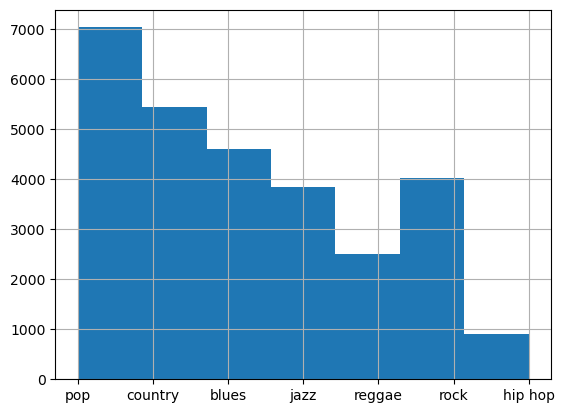

In [44]:
df['genre'].hist(bins=7)

In [65]:
data = df[attributes].to_numpy()

In [66]:
data

array([[5.98086126e-04, 6.37461276e-02, 5.98086157e-04, ...,
        9.01821862e-01, 3.39447650e-01, 1.37110188e-01],
       [3.55371338e-02, 9.67767423e-02, 4.43435174e-01, ...,
        1.52834008e-06, 3.25020610e-01, 2.63240253e-01],
       [2.77008311e-03, 2.77008322e-03, 2.77008334e-03, ...,
        0.00000000e+00, 3.51813685e-01, 1.39112253e-01],
       ...,
       [1.50375949e-03, 1.54302437e-01, 1.68987767e-01, ...,
        1.10323887e-06, 8.38211047e-01, 7.67760515e-01],
       [1.19617227e-03, 1.19617229e-03, 1.19617228e-03, ...,
        5.03036437e-04, 5.08450124e-01, 8.85882322e-01],
       [1.01214575e-03, 7.52024945e-02, 1.01214577e-03, ...,
        0.00000000e+00, 4.75474031e-01, 4.92476642e-01]])

In [81]:
n = len(df)
n

28372

In [75]:
genres = df['genre'].unique()
genres

array(['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop'],
      dtype=object)

In [141]:
labels = df['genre'].to_numpy()
labels_array = np.zeros((n, len(genres)))
for k, genre in enumerate(genres):
    labels_array[:, k] = labels == genre

In [135]:
labels = df['genre'].to_numpy()
labels_array = np.zeros(n)
for k, genre in enumerate(genres):
    labels_array = (labels == genre)*(k+1)

In [142]:
X = data
y = labels_array

In [143]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn

In [144]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.10565272943560823

In [147]:
X_train.shape

(22697, 22)

In [146]:
# Predict on the test set
y_pred = model.predict(X_test) >= 0.5  # Convert probabilities to binary outcomes

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [117]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.

    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.

    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

    Read more in the :ref:`User Guide <confusion_matrix>`.

    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.

    labels : array-like of shape (n_classes), default=None
        List of lab

In [59]:
import numpy as np
import pandas as pd

class LogisticRegression:
    
    def __init__(self, lr=0.1, max_iter=1000, tol=1e-4):
        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol
        self.W = None
        self.b = None

        
    def fit(self, X, y):
        """
        Estimates parameters for the classifier
        
        Args:
            X (array<m,n>): a matrix of floats with
                m rows (#samples) and n columns (#features)
            y (array<m>): a vector of floats containing 
                m binary 0.0/1.0 labels
        """
        self.W = np.zeros(X.shape[1])
        self.b = 0.0

        prev_cost = 0.0
        for i in range(self.max_iter):
            h0 = sigmoid(np.dot(X, self.W) + self.b)
            gradient = np.dot(X.T, (h0 - y)) / y.size
            self.W -= self.lr * gradient
            self.b -= self.lr * np.mean(h0 - y)
            
            cost = binary_cross_entropy(y, h0)
            if abs(cost - prev_cost) < self.tol:
                break
            prev_cost = cost

        print(f'Converged after {i+1} iterations')

    
    def predict(self, X):
        """
        Generates predictions
        
        Note: should be called after .fit()
        
        Args:
            X (array<m,n>): a matrix of floats with 
                m rows (#samples) and n columns (#features)
            
        Returns:
            A length m array of floats in the range [0, 1]
            with probability-like predictions
        """
        return sigmoid(np.dot(X, self.W) + self.b)
        

        
# --- Some utility functions 

def binary_accuracy(y_true, y_pred, threshold=0.5):
    """
    Computes binary classification accuracy
    
    Args:
        y_true (array<m>): m 0/1 floats with ground truth labels
        y_pred (array<m>): m [0,1] floats with "soft" predictions
        
    Returns:
        The average number of correct predictions
    """
    assert y_true.shape == y_pred.shape
    y_pred_thresholded = (y_pred >= threshold).astype(float)
    correct_predictions = y_pred_thresholded == y_true 
    return correct_predictions.mean()
    

def binary_cross_entropy(y_true, y_pred, eps=1e-15):
    """
    Computes binary cross entropy 
    
    Args:
        y_true (array<m>): m 0/1 floats with ground truth labels
        y_pred (array<m>): m [0,1] floats with "soft" predictions
        
    Returns:
        Binary cross entropy averaged over the input elements
    """
    assert y_true.shape == y_pred.shape
    y_pred = np.clip(y_pred, eps, 1 - eps)  # Avoid log(0)
    return - np.mean(
        y_true * np.log(y_pred) + 
        (1 - y_true) * (np.log(1 - y_pred))
    )


def sigmoid(x):
    """
    Applies the logistic function element-wise
    
    Hint: highly related to cross-entropy loss 
    
    Args:
        x (float or array): input to the logistic function
            the function is vectorized, so it is acceptible
            to pass an array of any shape.
    
    Returns:
        Element-wise sigmoid activations of the input 
    """
    return 1. / (1. + np.exp(-x))


#Source: TDT4173 Machine Learning